## Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, kstest, norm
import seaborn as sns

## Linear Congruential Generator

Evaluating LCG with a=1103515245, b=12345, M=2147483648


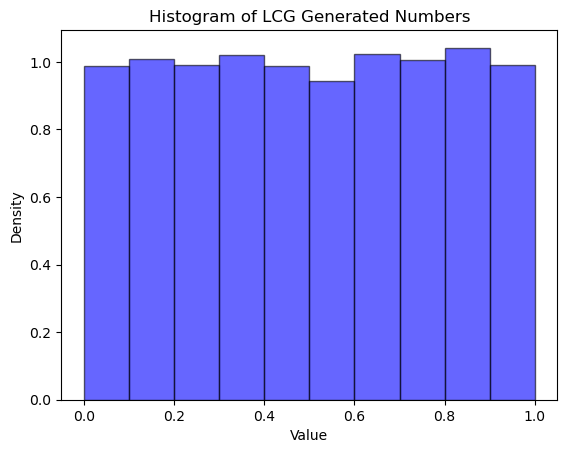

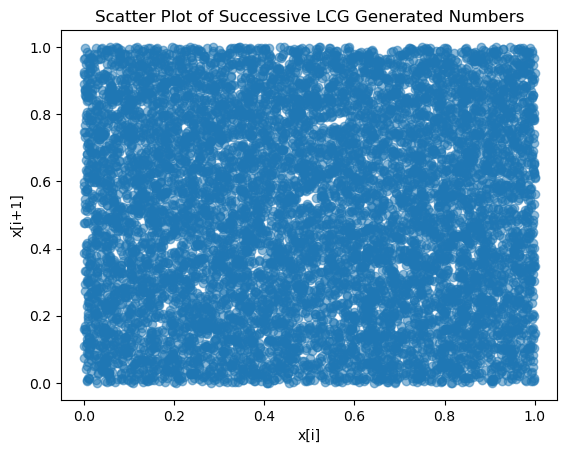

Chi-Square Test: Statistic = 6.5400, p-value = 0.6849
Kolmogorov-Smirnov Test: Statistic = 0.0081, p-value = 0.5270
Runs Test: Statistic = 1.0277, p-value = 0.3041
Correlation Test: Correlation Coefficient = -0.0037
Evaluating LCG with a=214013, b=2531011, M=4294967296


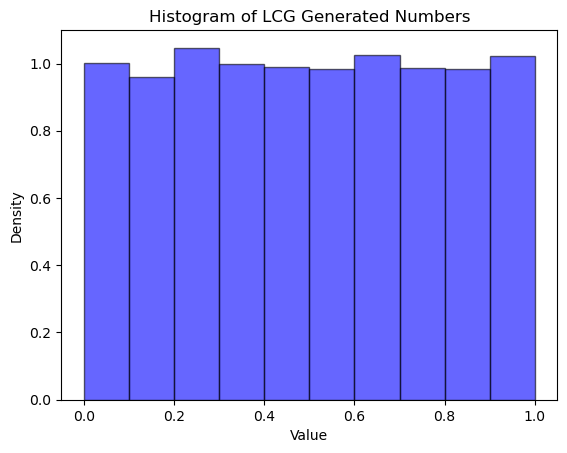

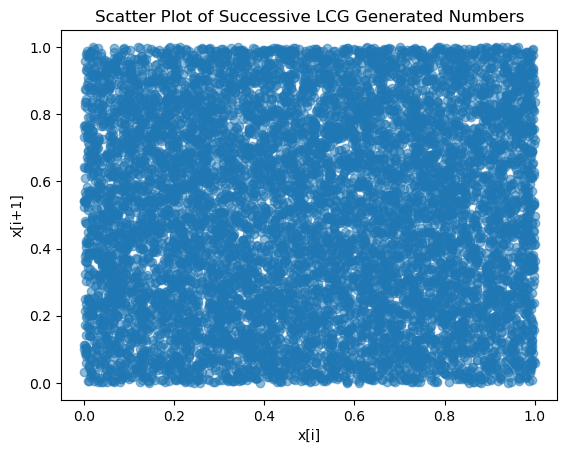

Chi-Square Test: Statistic = 5.7620, p-value = 0.7635
Kolmogorov-Smirnov Test: Statistic = 0.0053, p-value = 0.9370
Runs Test: Statistic = 0.1502, p-value = 0.8806
Correlation Test: Correlation Coefficient = 0.0057
Evaluating LCG with a=1664525, b=1013904223, M=4294967296


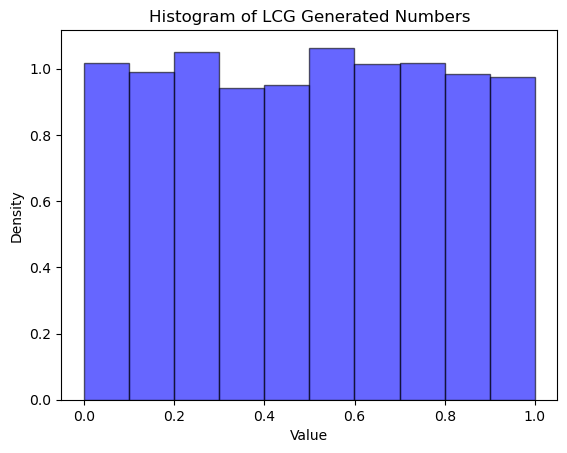

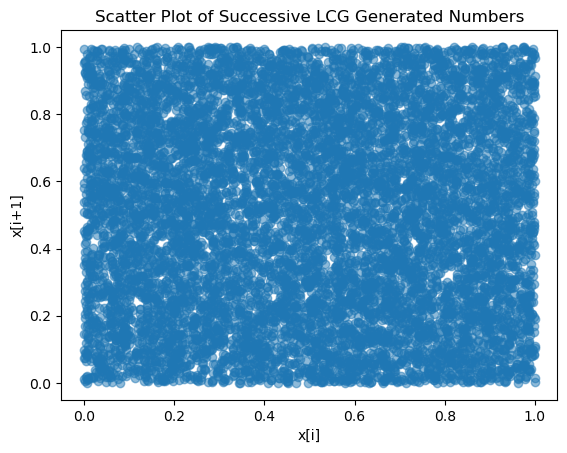

Chi-Square Test: Statistic = 14.2600, p-value = 0.1134
Kolmogorov-Smirnov Test: Statistic = 0.0060, p-value = 0.8673
Runs Test: Statistic = 1.0277, p-value = 0.3041
Correlation Test: Correlation Coefficient = -0.0153
Evaluating Bad LCG with a=1, b=0, M=4294967296


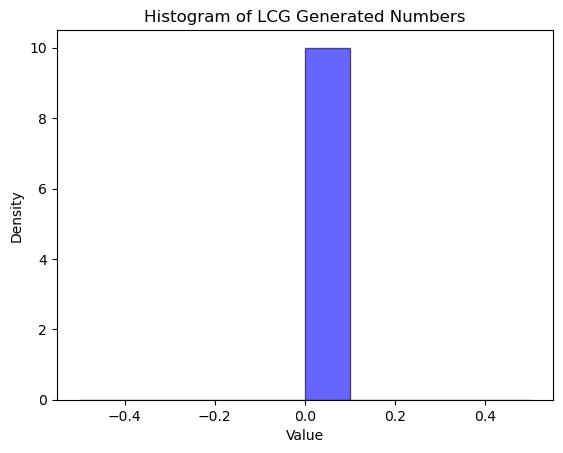

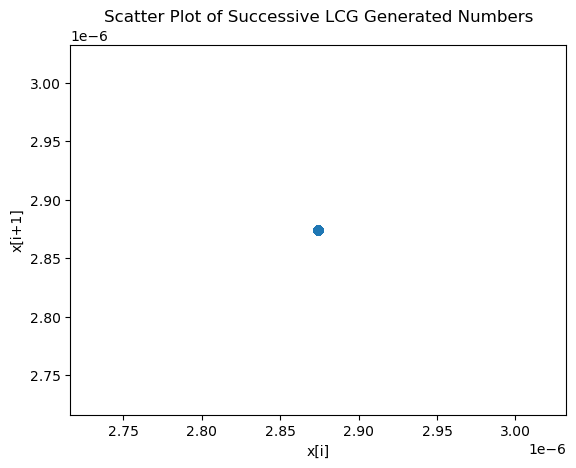

Chi-Square Test: Statistic = 90000.0000, p-value = 0.0000
Kolmogorov-Smirnov Test: Statistic = 1.0000, p-value = 0.0000
Runs Test: Statistic = -158.0902, p-value = 0.0000
Correlation Test: Correlation Coefficient = nan
Evaluating Good LCG with a=1664525, b=1013904223, M=4294967296


/Users/frederiknagel/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


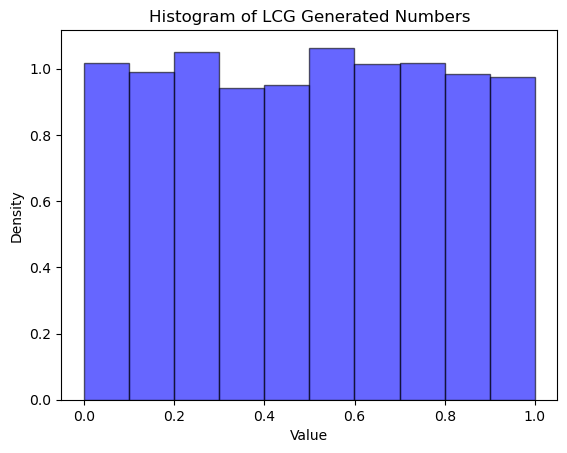

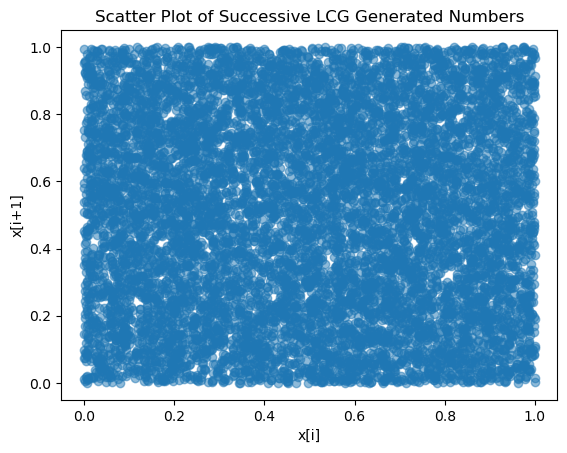

Chi-Square Test: Statistic = 14.2600, p-value = 0.1134
Kolmogorov-Smirnov Test: Statistic = 0.0060, p-value = 0.8673
Runs Test: Statistic = 1.0277, p-value = 0.3041
Correlation Test: Correlation Coefficient = -0.0153


In [2]:
# Linear Congruential Generator
class LCG:
    def __init__(self, seed, a, b, M):
        self.seed = seed
        self.a = a
        self.b = b
        self.M = M
        self.state = seed

    def next(self):
        self.state = (self.a * self.state + self.b) % self.M
        return self.state

# Function to generate random numbers
def generate_lcg_numbers(n, seed, a, b, M):
    lcg = LCG(seed, a, b, M)
    return np.array([lcg.next() for _ in range(n)]) / M

# Function to evaluate the quality of the generator
def evaluate_lcg(random_numbers):
    plt.hist(random_numbers, bins=10, density=True, alpha=0.6, color='b', edgecolor='black')
    plt.title('Histogram of LCG Generated Numbers')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()
    
    plt.scatter(random_numbers[:-1], random_numbers[1:], alpha=0.5)
    plt.title('Scatter Plot of Successive LCG Generated Numbers')
    plt.xlabel('x[i]')
    plt.ylabel('x[i+1]')
    plt.show()

    chi2_stat, chi2_p = chi2_contingency_test(random_numbers)
    ks_stat, ks_p = kstest(random_numbers, 'uniform')
    runs_stat, runs_p = run_test(random_numbers)
    correlation = np.corrcoef(random_numbers[:-1], random_numbers[1:])[0, 1]

    print(f"Chi-Square Test: Statistic = {chi2_stat:.4f}, p-value = {chi2_p:.4f}")
    print(f"Kolmogorov-Smirnov Test: Statistic = {ks_stat:.4f}, p-value = {ks_p:.4f}")
    print(f"Runs Test: Statistic = {runs_stat:.4f}, p-value = {runs_p:.4f}")
    print(f"Correlation Test: Correlation Coefficient = {correlation:.4f}")

def chi2_contingency_test(random_numbers):
    expected_counts = len(random_numbers) / 10
    observed_counts, _ = np.histogram(random_numbers, bins=10)
    chi2_stat = np.sum((observed_counts - expected_counts)**2 / expected_counts)
    p_value = chi2.sf(chi2_stat, df=9)
    return chi2_stat, p_value

def run_test(random_numbers):
    runs = np.sum(np.diff(np.sign(np.diff(random_numbers))) != 0) + 1
    n = len(random_numbers)
    expected_runs = 2 * n / 3.0
    variance_runs = 16 * n / 90.0
    z = (runs - expected_runs) / np.sqrt(variance_runs)
    p_value = 2 * norm.sf(np.abs(z))
    return z, p_value

# Generate random numbers using different parameters
params = [
    (10_000, 12345, 1103515245, 12345, 2**31),
    (10_000, 12345, 214013, 2531011, 2**32),
    (10_000, 12345, 1664525, 1013904223, 2**32)
]

for n, seed, a, b, M in params:
    random_numbers = generate_lcg_numbers(n, seed, a, b, M)
    print(f"Evaluating LCG with a={a}, b={b}, M={M}")
    evaluate_lcg(random_numbers)

# Example of a bad generator
bad_params = (10_000, 12345, 1, 0, 2**32)  # This is a bad choice
bad_random_numbers = generate_lcg_numbers(*bad_params)
print(f"Evaluating Bad LCG with a={bad_params[2]}, b={bad_params[3]}, M={bad_params[4]}")
evaluate_lcg(bad_random_numbers)

# Example of a decent generator
good_params = (10_000, 12345, 1664525, 1013904223, 2**32)  # This is a good choice
good_random_numbers = generate_lcg_numbers(*good_params)
print(f"Evaluating Good LCG with a={good_params[2]}, b={good_params[3]}, M={good_params[4]}")
evaluate_lcg(good_random_numbers)



## Test functions

In [4]:
# Chi-Square Test
def chi2_test(random_numbers, bins=10):
    expected_counts = len(random_numbers) / bins
    observed_counts, _ = np.histogram(random_numbers, bins=bins)
    chi2_stat = np.sum((observed_counts - expected_counts)**2 / expected_counts)
    p_value = chi2.sf(chi2_stat, df=bins-1)
    return chi2_stat, p_value

# Kolmogorov-Smirnov Test
def kolmogorov_smirnov_test(random_numbers):
    ks_stat, p_value = kstest(random_numbers, 'uniform')
    return ks_stat, p_value

# Above/Below Runs Test
def run_test_1(random_numbers):
    # above/below
    median = np.median(random_numbers)
    runs = np.sum(np.diff(np.sign(random_numbers - median)) != 0) + 1
    n = len(random_numbers)
    expected_runs = (2 * n - 1) / 3
    variance_runs = (16 * n - 29) / 90
    z = (runs - expected_runs) / np.sqrt(variance_runs)
    p_value = 2 * norm.sf(np.abs(z))
    return z, p_value

# Up/Down Runs Test
def run_test_2(random_numbers):
    # up/down
    runs = np.sum(np.diff(np.sign(np.diff(random_numbers))) != 0) + 1
    n = len(random_numbers)
    expected_runs = (2 * n - 4) / 3
    variance_runs = (16 * n - 29) / 90
    z = (runs - expected_runs) / np.sqrt(variance_runs)
    p_value = 2 * norm.sf(np.abs(z))
    return z, p_value

# Up-and-Down Runs Test
def run_test_3(random_numbers):
    # up_and_down 
    n = len(random_numbers)
    signs = np.sign(np.diff(random_numbers))
    runs = np.sum(np.diff(signs) != 0) + 1
    expected_runs = (2 * n - 4) / 3
    variance_runs = (16 * n - 29) / 90
    z = (runs - expected_runs) / np.sqrt(variance_runs)
    p_value = 2 * norm.sf(np.abs(z))
    return z, p_value

## System Available Generator

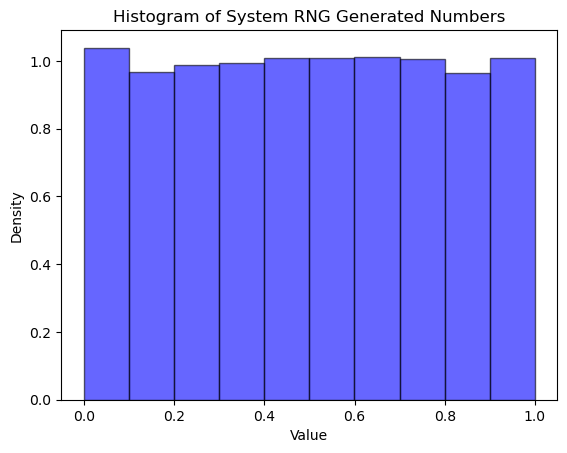

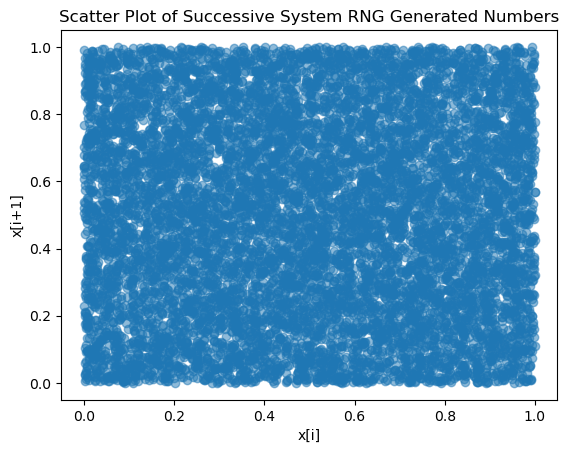

Chi-Square Test: Statistic = 4.3380, p-value = 0.8878
Kolmogorov-Smirnov Test: Statistic = 0.0063, p-value = 0.8268
Runs Test: Statistic = 0.2214, p-value = 0.8248
Correlation Test: Correlation Coefficient = -0.0081


In [3]:
# Function to generate random numbers using NumPy's default RNG
def generate_system_random_numbers(n):
    rng = np.random.default_rng()
    return rng.random(n)

# Function to evaluate the quality of the generator
def evaluate_system_rng(random_numbers):
    plt.hist(random_numbers, bins=10, density=True, alpha=0.6, color='b', edgecolor='black')
    plt.title('Histogram of System RNG Generated Numbers')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()
    
    plt.scatter(random_numbers[:-1], random_numbers[1:], alpha=0.5)
    plt.title('Scatter Plot of Successive System RNG Generated Numbers')
    plt.xlabel('x[i]')
    plt.ylabel('x[i+1]')
    plt.show()

    chi2_stat, chi2_p = chi2_contingency_test(random_numbers)
    ks_stat, ks_p = kstest(random_numbers, 'uniform')
    runs_stat, runs_p = run_test(random_numbers)
    correlation = np.corrcoef(random_numbers[:-1], random_numbers[1:])[0, 1]

    print(f"Chi-Square Test: Statistic = {chi2_stat:.4f}, p-value = {chi2_p:.4f}")
    print(f"Kolmogorov-Smirnov Test: Statistic = {ks_stat:.4f}, p-value = {ks_p:.4f}")
    print(f"Runs Test: Statistic = {runs_stat:.4f}, p-value = {runs_p:.4f}")
    print(f"Correlation Test: Correlation Coefficient = {correlation:.4f}")

def chi2_contingency_test(random_numbers):
    expected_counts = len(random_numbers) / 10
    observed_counts, _ = np.histogram(random_numbers, bins=10)
    chi2_stat = np.sum((observed_counts - expected_counts)**2 / expected_counts)
    p_value = chi2.sf(chi2_stat, df=9)
    return chi2_stat, p_value

def run_test(random_numbers):
    runs = np.sum(np.diff(np.sign(np.diff(random_numbers))) != 0) + 1
    n = len(random_numbers)
    expected_runs = 2 * n / 3.0
    variance_runs = 16 * n / 90.0
    z = (runs - expected_runs) / np.sqrt(variance_runs)
    p_value = 2 * norm.sf(np.abs(z))
    return z, p_value

# Generate random numbers using system RNG
n_samples = 10000
system_random_numbers = generate_system_random_numbers(n_samples)

# Evaluate the quality of the system RNG
evaluate_system_rng(system_random_numbers)